# Step 3: choose & load image

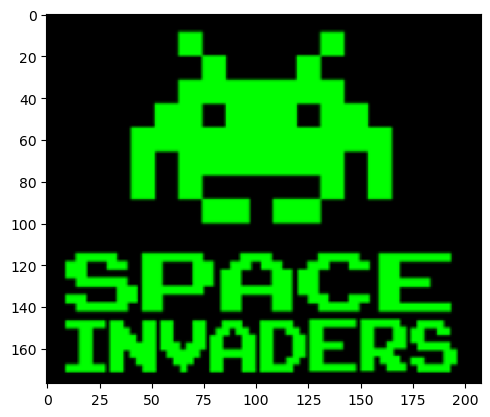

(177, 208, 4)


In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = PIL.Image.open(os.path.join(os.getcwd(), 'data', 'input', 'image_raw.png')) # in case of error, replace line by: loc_input_img = os.path.join('..', 'data', 'input', 'image_raw.png')
img = np.array(loc_input_img)
plt.imshow(img)
plt.show()
print(img.shape)

# Step 4: Image manipulations

Manipulation 1: create image multiplication

In [2]:
# for sake of performance: make/reserve array with shape of end result, based on shape of starting image 
rows, columns, colour = np.shape(img)
img_tile = np.zeros([rows*3, columns*8, colour])

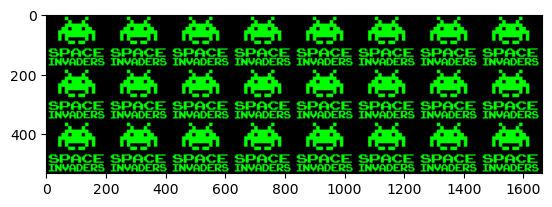

In [3]:
img_tile = np.tile(img, (3, 8, 1))
plt.imshow(img_tile)

Image.fromarray(img_tile).save('data/output/image_manipulation1.png')

Manipulation 1: flip images

In [4]:
# make array with shape of end result
rows, columns, colour = np.shape(img)
img_flip = np.zeros([rows*4, columns*6, colour])

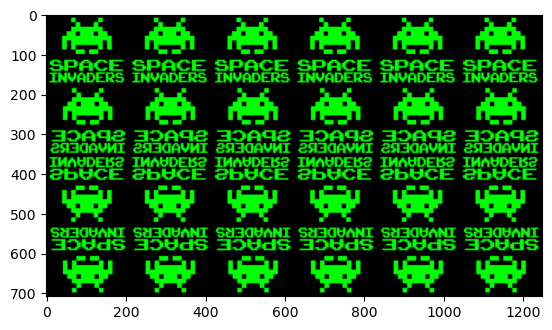

In [5]:
# flip original image in three ways
img_mirror = np.fliplr(img)
img_upside = np.flipud(img)
img_mirrorup = np.flipud(img_mirror)

# stack 4 images and concatenate vertically
img_flip = np.concatenate([img, img_mirror, img_upside, img_mirrorup], axis=0)
img_flip = np.tile(img_flip, (1, 6, 1))
plt.imshow(img_flip)

Image.fromarray(img_flip).save('data/output/image_manipulation2.png')

Manipulation 3: colourful tiles

In [6]:
# make array with shape of end result
rows, columns, colour = np.shape(img)
img_full = np.zeros([rows*4, columns*4, colour])

(708, 832, 4)

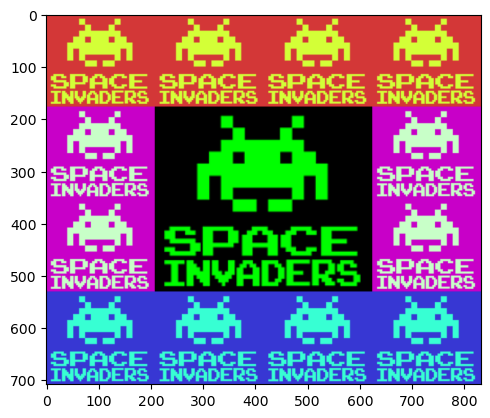

In [7]:
# Colour & tile images
img_pink = img.copy()
img_pink[:,:,[0,2]] = 200 # play with colour layers
img_pink = np.tile(img_pink, (2, 1, 1))

img_red = img.copy()
img_red[:,:,[0,3]] = 200
img_red = np.tile(img_red, (1, 4, 1))

img_blue = img.copy()
img_blue[:,:,[2,3]] = 200
img_blue = np.tile(img_blue, (1, 4, 1))

# Enlarge original image
img_large = img.copy()
img_large = img_large.repeat(2, axis=0).repeat(2, axis=1)

# Wrap in one array
img_full = np.concatenate([img_pink, img_large, img_pink], axis=1)
img_full = np.concatenate([img_red, img_full, img_blue], axis=0)
plt.imshow(img_full)

Image.fromarray(img_full).save('data/output/image_manipulation3.png')
img_full.shape

# Step 5: Generalize manipulations

Function 1:  grid_with_flips

 4
 6


None


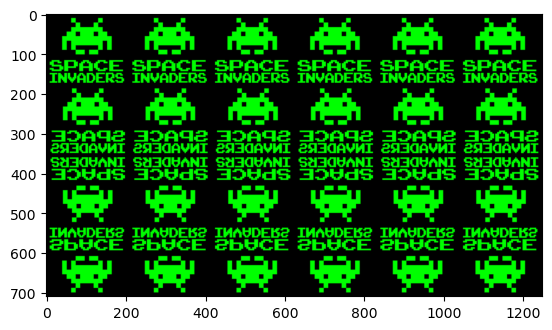

In [17]:
rows = int(input())
columns = int(input())
image = img.copy()
img_rows, img_columns, img_colour = np.shape(image)

# Make matrix with same values per row
matrix = np.zeros([0, columns])
for i in range(rows):
    newrow = np.full((1,columns), i)
    matrix = np.concatenate([matrix, newrow], axis = 0)

def grid_with_flips(image, matrix):
    # Prepare arrays
    img_row = np.zeros([img_rows,img_columns,img_colour])
    img_array = np.zeros([img_rows,img_columns*(columns),img_colour])
    for i in range(rows):  
        # create row where image flips according to value in matrix
        for j in range(columns):
            if matrix[i][j] == 1:
                image1 = np.fliplr(image)
                img_row = np.concatenate([img_row, image1], axis = 1)
            elif matrix[i][j] == 2:
                image2 = np.flipud(np.fliplr(image))
                img_row = np.concatenate([img_row, image2], axis = 1)
            elif matrix[i][j] == 3:
                image3 = np.flipud(image)
                img_row = np.concatenate([img_row, image3], axis = 1)
            else:
                img_row = np.concatenate([img_row, image], axis = 1)
                
        # add row vertically to array  
        new_row = img_row.copy()
        new_row = new_row[:,img_columns:] # get rid of empty/zeros columns, that were created before concatenation
        img_array = np.concatenate([img_array, new_row], axis = 0)
        img_array = img_array[int((img_rows/rows)):] # get rid of empty/zeros rows, that were created before concatenation
        
        # fill row with zeros again before start new row 
        img_row = np.zeros([img_rows,img_columns,img_colour])
        
    plt.imshow(img_array.astype(np.uint8)) # cast as uint8 to get rid of feature warning of plt

result = grid_with_flips(image, matrix)
print(result)

Function 2: Create colourfull big one

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(177, 208, 4)


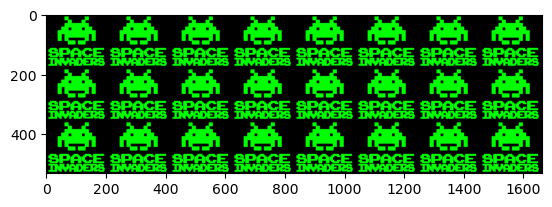

In [68]:


rows = 3 # int(input())
columns = 8 # int(input())
image = img.copy()
img_rows, img_columns, img_colour = np.shape(image)
print(image.shape)

# Make matrix with same values per row
matrix = np.zeros([0, columns])
for i in range(rows):
    newrow = np.full((rows,columns), i)
    matrix = np.concatenate([matrix, newrow], axis = 0)

# def grid_with_flips(image, matrix):
    # Prepare arrays
img_row = np.zeros([img_rows,img_columns,img_colour])
img_array = np.zeros([0,img_columns*(columns),img_colour]) # img_array = np.zeros([0,img_columns*(columns),img_colour]) 
for i in range(rows):  
    # create row where image flips according to value in matrix
    for j in range(columns):
        if matrix[i][j] == 1:
            image1 = np.fliplr(image)
            img_row = np.concatenate([img_row, image1], axis = 1)
        elif matrix[i][j] == 2:
            image2 = np.flipud(np.fliplr(image))
            img_row = np.concatenate([img_row, image2], axis = 1)
        elif matrix[i][j] == 3:
            image3 = np.flipud(image)
            img_row = np.concatenate([img_row, image3], axis = 1)
        else:
            img_row = np.concatenate([img_row, image], axis = 1)
            
    # add row vertically to array  
    new_row = img_row.copy()
    new_row = new_row[:,img_columns:] # get rid of empty/zeros columns, that were created before concatenation
    img_array = np.concatenate([img_array, new_row], axis = 0)
    # img_array = img_array[int((img_rows/rows)):] # get rid of empty/zeros rows, that were created before concatenation
    
    # fill row with zeros again before start new row 
    img_row = np.zeros([img_rows,img_columns,img_colour])
        
plt.imshow(img_array)

# result = grid_with_flips(image, matrix)
# print(result)

In [ ]:
# matrix = np.zeros([rows, columns])
# print('matrix original:', matrix)
# for i in range(rows):
#     newrow = np.full((1,columns), i)
#     matrix = np.concatenate([matrix, newrow], axis = 0)
# print(matrix[2:3,])


# loop through matrix, for every value do flip that's defined

# def grid_with_flips(image, matrix):
# for i in matrix:
#     print('itype:', i )
#     for j in matrix[1:2, int(i)]:
#         print(image)
        # image = np.tile( np.fliplr(image), (1,6,1)) 
        # matrix[2:3,i] = np.flipud(image) 
        # matrix[3:4,i] = np.flipud(image)

# print(matrix)
# plt.imshow(matrix)

# Je kan ook best één toevoegen 'voeg geen afbeelding toe'

# np.fliplr(image)
# plt.imshow(image)

# [[1 for i in range(7)] for j in range(3)] 
# [[j for i in range(7)] for i in range(3)]

# for i in range(matrix): #range(rows, columns):
#     print('i:',matrix[[i,j]])
#     if matrix[[i,]] == 1:
#         matrix[[i]] = np.fliplr(image)
#     else:
#         matrix[i] = np.flipud(image)
# plt.imshow(matrix)

# 177, 208, 4

# loop over np_full en voer functies uit van matrix

# for j in range(columns):
#     for i in range(rows):
#         if matrix[i][j] == 1:
#             print('matrix i j:', matrix[i][j])
#             image = np.fliplr(image)
#             img_full[:i*177,j*208] = image
#             # img_full = np.append(img_full, image)
#             # matrix[1,1]
#             # matrix[i][j] = np.fliplr(image)
#             # np.where(np.logical_and(img!=background, img != border), img, [254, 254, 254])
#             # np.where(int(matrix[i][j]) == 1.0, image, image)
#         else:
#             print('matrix i j else:', matrix[i][j])
#         #     matrix[i][j] = np.fliplr(image)


In [ ]:
copyleft = np.tile(imgcopy2, (2, 1, 1))
plt.imshow(copyleft)
img_copylarge = np.concatenate([copyleft, copylarge], axis=1)
plt.imshow(img_copylarge)

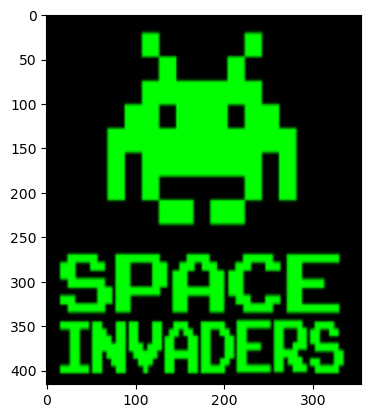

In [112]:
# enlarge image
img_larger = cv2.imread('data/input/image_raw.png')
res = cv2.resize(img_larger, dsize=(177*2, 208*2), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('data/output/image_larger.png', res)

loc_input_img_larger = PIL.Image.open(os.path.join(os.getcwd(), 'data', 'output', 'image_larger.png')) # in case of error, replace line by: loc_input_img = os.path.join('..', 'data', 'input', 'image_larger.png')
img_larger = np.array(loc_input_img_larger)
plt.imshow(img_larger)
# print(img_larger.shape)

# im_larger = np.pad(img_larger, [177*4, 208*4])
# plt.imshow(im_larger)

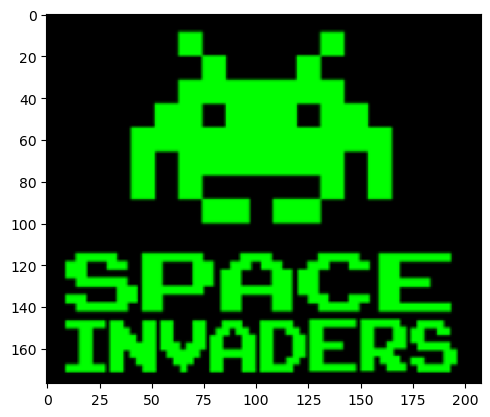

In [113]:
imgcopy = img.copy()
plt.imshow(imgcopy)
plt.show()

(177, 208)


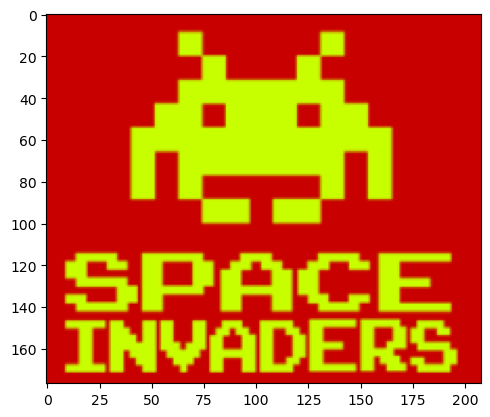

In [114]:
f_reddish = img.copy()

height,width = f_reddish.shape[:2] #get width and height of image
print(f_reddish.shape[:2])
# f_reddish[100:400, 100:200, :] = 0
f_reddish[0:177, 0:208, 0] = 200 # blue: f_reddish[0:177, 0:208, 2] = 200, grey: f_reddish[0:177, 0:208, 3] = 200, red: f_reddish[0:177, 0:208, 0] = 200
plt.imshow(f_reddish)
plt.show()

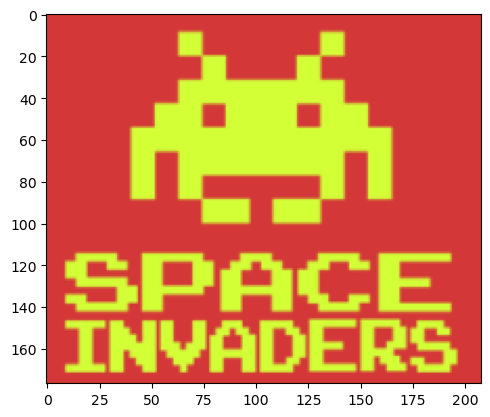

In [120]:
img_red = img.copy()
for i,j in img:
    print(img_red[i:i,j:j])
    # img_red[:,:,[0,3]] = 200 # roze: img_red[:,:,[0,2]] = 250, rood: img_red[:,:,[0,3]] = 200, blue: img_red[:,:,[2,3]] = 200
plt.imshow(img_red)
# plt.show()

ValueError: too many values to unpack (expected 2)

In [178]:
print(img.shape)
red_f = img.copy()
red_f.reshape(177,208,2)
red_f[:,:,[1,2]] = 100
plt.imshow(red_f)
plt.show()

(177, 208, 4)


ValueError: cannot reshape array of size 147264 into shape (177,208,2)

In [1]:
# colour change of black (= background in this case), => starting from black (= '0') to another colour

img_copy = np.copy(img)

# img = Image.open('data/input/image_raw.png')
# max_colors = 10000
# print(img.getcolors(max_colors))

r1, g1, b1 = 0, 0, 0 # Original value
r2, g2, b2, a2 = 255, 255, 255, 255 # Value that we want to replace it with
red, green, blue, alpha = img_copy[:,:,0], img_copy[:,:,1], img_copy[:,:,2], img_copy[:,:,3] # alpha = overlay
mask = (red == r1) & (green == g1) & (blue == b1) & (alpha == a2)
img_copy[:,:,:4][mask] = [r2, g2, b2, a2]

plt.imshow(img_copy)

NameError: name 'np' is not defined

(177, 208, 4)


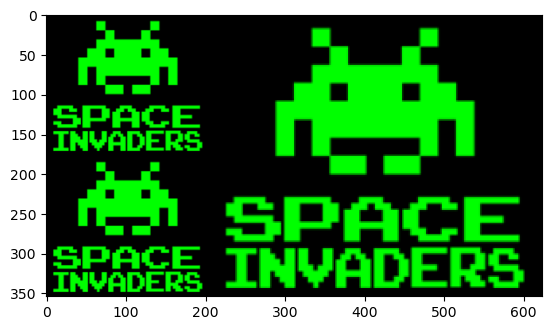

In [26]:
imgcopy2 = img.copy()
print(imgcopy2.shape)

copylarge = imgcopy2.repeat(2, axis=0).repeat(2, axis=1)
plt.imshow(imgcopylarge)
copyleft = np.tile(imgcopy2, (2, 1, 1))
plt.imshow(copyleft)
img_copylarge = np.concatenate([copyleft, copylarge], axis=1)
plt.imshow(img_copylarge)

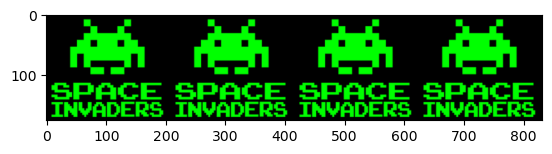

In [18]:
imgcopylarge = imgcopy2.repeat(2, axis=0).repeat(2, axis=1)
plt.imshow(imgcopylarge)
img_row1 = np.tile(img, (1, 4, 1))
plt.imshow(img_row1)

#for in range(len(imgcopy2):
#             img_tile = np.tile(imgcopy2[i,]
             
# img_tile = np.tile(imgcopy2, (3, 8, 1))
# plt.imshow(imgcopy2)
# print(imgcopy2.shape)

In [ ]:
rows = 3 # int(input())
columns = 8 # int(input())
image = img.copy()
img_rows, img_columns, img_colour = np.shape(image)

# Make matrix with same values per row
matrix = np.zeros([0, columns])
for i in range(rows):
    newrow = np.full((1,columns), i)
    matrix = np.concatenate([matrix, newrow], axis = 0)
# print('matrix:', matrix)

img_five = np.zeros([177,208,4])
img_six = np.zeros([177,208*(columns+1), 4])

for i in range(rows):  
    # print('--------------NEW ROW starts for i=', i)
    # make row where image flips according to value in matrix
    for j in range(columns):
        # print('row i, column j, value:', i, j, matrix[i][j])
        if matrix[i][j] == 1:
            image1 = np.fliplr(image)
            img_five = np.concatenate([img_five, image1], axis = 1)
        elif matrix[i][j] == 2:
            image2 = np.flipud(np.fliplr(image))
            img_five = np.concatenate([img_five, image2], axis = 1)
        elif matrix[i][j] == 3:
            image3 = np.flipud(image)
            img_five = np.concatenate([img_five, image3], axis = 1)
        else:
            img_five = np.concatenate([img_five, image], axis = 1)
            
    # after each row has been made, add row vertically to array, and fill new_row with zeros to start new row  
    img_five = img_five[:208]
    new_row = img_five.copy()
    img_five = np.zeros([177,208,4])
    # print('newrow.shape:',new_row.shape)
    # new_row = new_row[:50,]
    # print('new row', new_row.shape)
    # print('img six:     ', img_six.shape)
    img_six = np.concatenate([img_six, new_row], axis = 0)

plt.imshow(img_six)

 3
 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


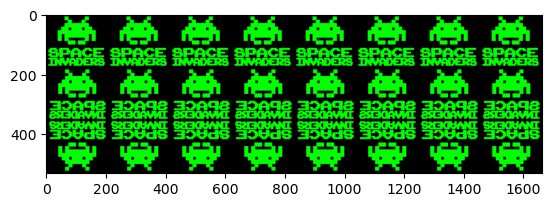

In [66]:
rows = int(input())
columns = int(input())
image = img.copy()
img_rows, img_columns, img_colour = np.shape(image)

# Make matrix with same values per row
matrix = np.zeros([0, columns])
for i in range(rows):
    newrow = np.full((1,columns), i)
    matrix = np.concatenate([matrix, newrow], axis = 0)
# print('matrix:', matrix)

img_row = np.zeros([img_rows,img_columns,img_colour])
# print(img_row[177:,].shape)
img_array = np.zeros([0,img_columns*(columns),img_colour]) 

for i in range(rows):  
    # print('--------------NEW ROW starts for i=', i)
    # make row where image flips according to value in matrix
    for j in range(columns):
        # print('row i, column j, value:', i, j, matrix[i][j])
        if matrix[i][j] == 1:
            image1 = np.fliplr(image)
            img_row = np.concatenate([img_row, image1], axis = 1)
        elif matrix[i][j] == 2:
            image2 = np.flipud(np.fliplr(image))
            img_row = np.concatenate([img_row, image2], axis = 1)
        elif matrix[i][j] == 3:
            image3 = np.flipud(image)
            img_row = np.concatenate([img_row, image3], axis = 1)
        else:
            img_row = np.concatenate([img_row, image], axis = 1)
            
    # after creation of new row, add row vertically to array, and fill new_row with zeros again before start new row  
    new_row = img_row.copy()
    new_row = new_row[:,img_columns:] # get rid of first empty/zeros columns, that were created before concatenation
    img_row = np.zeros([img_rows,img_columns,img_colour])
    img_array = np.concatenate([img_array, new_row], axis = 0)

plt.imshow(img_array)

 3
 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


None


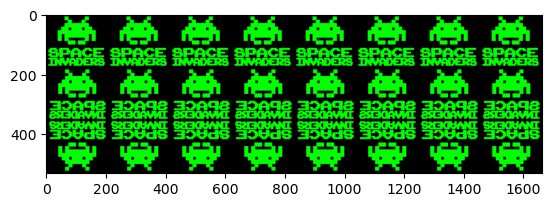

In [9]:
rows = int(input())
columns = int(input())
image = img.copy()
img_rows, img_columns, img_colour = np.shape(image)

# Make matrix with same values per row
matrix = np.zeros([0, columns])
for i in range(rows):
    newrow = np.full((1,columns), i)
    matrix = np.concatenate([matrix, newrow], axis = 0)

def grid_with_flips(image, matrix):
    # Prepare arrays
    img_row = np.zeros([img_rows,img_columns,img_colour])
    img_array = np.zeros([img_rows,img_columns*(columns),img_colour])
    for i in range(rows):  
        # create row where image flips according to value in matrix
        for j in range(columns):
            if matrix[i][j] == 1:
                image1 = np.fliplr(image)
                img_row = np.concatenate([img_row, image1], axis = 1)
            elif matrix[i][j] == 2:
                image2 = np.flipud(np.fliplr(image))
                img_row = np.concatenate([img_row, image2], axis = 1)
            elif matrix[i][j] == 3:
                image3 = np.flipud(image)
                img_row = np.concatenate([img_row, image3], axis = 1)
            else:
                img_row = np.concatenate([img_row, image], axis = 1)
                
        # add row vertically to array  
        new_row = img_row.copy()
        new_row = new_row[:,img_columns:] # get rid of empty/zeros columns, that were created before concatenation
        img_array = np.concatenate([img_array, new_row], axis = 0)
        img_array = img_array[int((img_rows/rows)):] # get rid of empty/zeros rows, that were created before concatenation
        
        # fill row with zeros again before start new row 
        img_row = np.zeros([img_rows,img_columns,img_colour])
        
    plt.imshow(img_array)

result = grid_with_flips(image, matrix)
print(result)